# Workshop 1️⃣ Exploratory Data Analysis & Study Design

**🎯 Goals of this Workshop**
1. Explore the Dataset
2. Define Inclusion and Exclusion Criteria to build a working cohort
3. Create visualizations and explore the variables' distributions
4. Define the target and objective of the model to build with the data set


**✏️ Expected Deliverables**
1. Flow diagram with inclusion and exclusion criteria, reporting who's being left out, by demographics
2. Define the Machine Learning Task to be addressed



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 0. Understand the Problem and Dataset

Please go through [Workshop 0](https://colab.research.google.com/gist/joamats/6838b5329b538e066c9de4468d3ee77b/mit-critical-data-workshop-0.ipynb) for an Introduction on the Problem, Dataset and Objective of the Datathon.

## 1. Inclusion/Exclusion Criteria Definition

In discussion between Data Scientists and Clinicians, try to answer these questions:
* What is a reasonable $SaO_2$ and $SpO_2$ cut-off value to avoid aberrant values and venous blood gas value?
* What is a reasonable time offset between $SaO_2$ and $SpO_2$ to create a pair?
* Are there patients from any demographics or with certain comorbidities that should not be included?
* Is there any specific treatment information that may influence?
* How to deal with multiple pairs per patient?


When taking these decisions, keep these into consideration:
* Are we keeping a reasonable amount of patients?
* What are the consequences of these decisions if we were to implement the result of this project in a real setting?
* Are we seggregating any group of patients?
* Are there groups that are more likely to be dropped in any approach and could introduce sampling selection bias?


### ✏️ Discussed Criteria
`Fill in with the ones you come up with as a team `

*
*

## 2. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
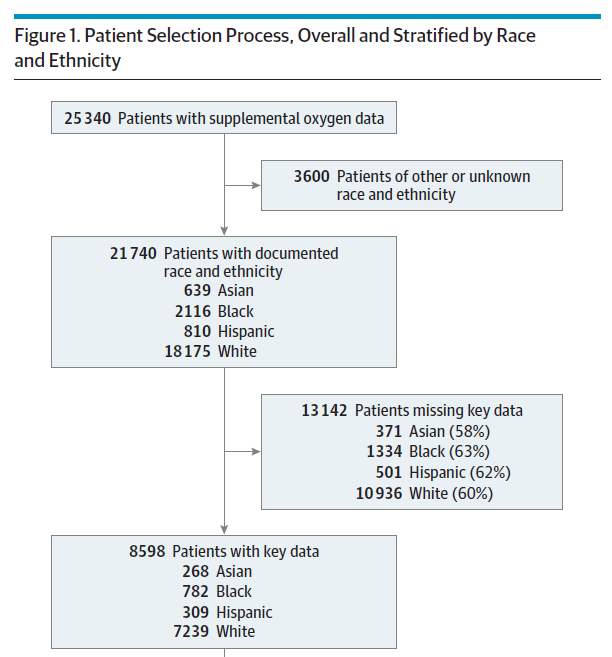
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

`Create code below to answer the following questions`



In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv('/content/drive/MyDrive/mimic_pulseOx_data.csv')

In [8]:
with pd.option_context('display.max_columns', None, 'display.max_rows',3):
  display(data)

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,anchor_age,race,race_group,language,insurance,weight,height,BMI,anchor_year_group,first_hosp_stay,first_icu_stay,icustay_seq,admittime,dischtime,icu_intime,icu_outtime,los_hospital,los_icu,CCI,SOFA_admission,mortality_in,delta_vent_start,ventilation_status,invasive_vent,delta_FiO2,FiO2,delta_rrt,rrt,delta_vp_start,norepinephrine_equivalent_dose,delta_sofa_coag,sofa_coag,delta_sofa_liver,sofa_liver,delta_sofa_cv,sofa_cv,delta_sofa_cns,sofa_cns,delta_sofa_renal,sofa_renal,delta_sofa_resp,sofa_resp,delta_hemoglobin,hemoglobin,delta_hematocrit,hematocrit,delta_mch,mch,delta_mchc,mchc,delta_mcv,mcv,delta_platelet,platelet,delta_rbc,rbc,delta_rdw,rdw,delta_wbc,wbc,delta_d_dimer,d_dimer,delta_fibrinogen,fibrinogen,delta_thrombin,thrombin,delta_inr,inr,delta_pt,pt,delta_ptt,ptt,delta_alt,alt,delta_alp,alp,delta_ast,ast,delta_bilirubin_total,bilirubin_total,delta_bilirubin_direct,bilirubin_direct,delta_bilirubin_indirect,bilirubin_indirect,delta_ck_cpk,ck_cpk,delta_ck_mb,ck_mb,delta_ggt,ggt,delta_ld_ldh,ld_ldh,delta_albumin,albumin,delta_aniongap,aniongap,delta_bicarbonate,bicarbonate,delta_bun,bun,delta_calcium,calcium,delta_chloride,chloride,delta_creatinine,creatinine,delta_glucose_lab,glucose_lab,delta_sodium,sodium,delta_potassium,potassium,delta_ph,ph,delta_lactate,lactate,delta_heart_rate,heart_rate,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,68,BLACK/AFRICAN AMERICAN,Black,ENGLISH,Medicare,65.0,157.0,26.370238,2008 - 2010,True,True,1,2131-01-07 20:39:00,2131-01-20 05:15:00,2131-01-11 04:20:05,2131-01-20 08:27:30,13,9.17,5,8,1,-4.0,NonInvasiveVent,0,0.0,40.0,NaN,0,NaN,NaN,476.0,1.0,-1024.0,0.0,-4,0,-64.0,0.0,-4.0,0.0,56.0,2.0,445.0,10.2,445.0,33.4,445.0,28.3,445.0,30.5,445.0,93.0,445.0,144.0,445.0,3.61,445.0,17.5,445.0,17.1,NaN,NaN,3656.0,339.0,NaN,NaN,-222.0,1.1,-222.0,12.4,-222.0,44.0,-1050.0,116.0,-1050.0,48.0,-1050.0,55.0,-1050.0,0.2,NaN,NaN,NaN,NaN,1804.0,786.0,-2313.0,14.0,NaN,NaN,-388239.0,260.0,-2313.0,3.5,445.0,15.0,445.0,31.0,445.0,32.0,445.0,8.9,445.0,95.0,445.0,1.2,445.0,199.0,445.0,135.0,445.0,5.8,0.0,7.38,0.0,1.1,-4,78.0,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81796,19999840,38978960,2164-09-17 13:34:00,25.0,-23,98,1,21033226,M,0,58,WHITE,White,ENGLISH,Other,77.5,178.0,24.460295,2008 - 2010,True,True,1,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-12 09:26:28,2164-09-17 16:35:15,7,5.29,2,8,1,NaN,NaN,0,NaN,NaN,NaN,0,-117.0,0.1607,26.0,0.0,-634.0,0.0,26,4,-34.0,0.0,26.0,0.0,26.0,2.0,-21.0,11.4,-21.0,33.0,-21.0,31.4,-21.0,34.5,-21.0,91.0,-21.0,288.0,-21.0,3.62,-21.0,14.4,-21.0,15.2,NaN,NaN,NaN,NaN,NaN,NaN,-6463.0,1.2,-6463.0,14.1,-6463.0,29.3,-645.0,87.0,-645.0,68.0,-645.0,88.0,-645.0,0.5,-7609.0,0.3,-7609.0,0.5,-339.0,147.0,-339.0,4.0,NaN,NaN,-645.0,212.0,-7609.0,4.3,-21.0,21.0,-21.0,18.0,-21.0,17.0,-21.0,7.4,-21.0,106.0,-21.0,0.7,-21.0,146.0,-21.0,139.0,-21.0,5.5,0.0,7.27,0.0,4.0,-14,74.0,-17,44.0,-14.0,29.0,-94.0,37.11,0.0,275.0,-94.0,SR (Sinus Rhythm)


How many patients do we have per racial-ethnic group, sex, and other demographics?

In [10]:
data.sex_female.value_counts(normalize=True)

0    0.64665
1    0.35335
Name: sex_female, dtype: float64

In [11]:
data.race_group.value_counts(normalize=True)

White       0.674915
Other       0.194286
Black       0.069000
Hispanic    0.034488
Asian       0.027312
Name: race_group, dtype: float64

In [12]:
data.language.value_counts(normalize=True)

ENGLISH    0.886389
?          0.113611
Name: language, dtype: float64

In [13]:
data.insurance.value_counts(normalize=True)

Other       0.477328
Medicare    0.465359
Medicaid    0.057313
Name: insurance, dtype: float64

What is the $SaO_2$ / $SpO_2$ measurement values range?


In [16]:
data.SaO2.describe()

count     81797.000000
mean        254.715941
std       12604.604554
min           0.000000
25%          95.000000
50%          97.000000
75%          98.000000
max      999999.000000
Name: SaO2, dtype: float64

In [17]:
data.SpO2.describe()

count    81797.000000
mean        96.786777
std          4.553809
min          0.000000
25%         95.000000
50%         98.000000
75%        100.000000
max        147.000000
Name: SpO2, dtype: float64

What is the typical $SaO_2$ - $SpO_2$ time offset?

In [20]:
data.delta_SpO2.describe()

count    81797.000000
mean       -26.009511
std         17.978644
min        -90.000000
25%        -40.000000
50%        -24.000000
75%        -11.000000
max          0.000000
Name: delta_SpO2, dtype: float64

In [22]:
data.delta_SpO2.median()

-24.0

Does that offset significantly vary for certain groups?

In [21]:
data[data['race_group'] == "White"].delta_SpO2.median()

-23.0

In [23]:
data[data['race_group'] == "Black"].delta_SpO2.median()

-24.0

How many pairs do we have per patient?


In [34]:
data.groupby(by="hadm_id").SaO2.count().describe()

count    15410.000000
mean         5.308047
std         11.515369
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        273.000000
Name: SaO2, dtype: float64

Are there groups with different no. pairs?

In [35]:
data[data['race_group'] == "White"].groupby(by="hadm_id").SaO2.count().describe()

count    10679.000000
mean         5.169585
std         10.867822
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        273.000000
Name: SaO2, dtype: float64

In [36]:
data[data['race_group'] == "Black"].groupby(by="hadm_id").SaO2.count().describe()

count    1182.000000
mean        4.774958
std         9.785426
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       212.000000
Name: SaO2, dtype: float64

These questions are mere examples. Which other questions are relevant?

In [ ]:
# Code here!

In [ ]:
# Code here!

In [ ]:
# Code here!

### ✏️ Apply your Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria.

**This is a good practice of study cohort selection!**

In [37]:
import pandas as pd
from typing import Dict

def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex,
              and English proficiency, with corresponding proportions.
    """
    demo = {}

    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }

    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex,
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed.
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str


In [75]:
# Working Example on the Dataset we just loaded
print(print_demo(get_demography(data)))

race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]
 sex: [Male: 64.7%, Female: 35.3%]
 language: [ENGLISH: 88.6%, ?: 11.4%]


We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ...
data_2 = ...
```



In [56]:
print(f"{len(data)} original instances")
print(print_demo(get_demography(data)))

# Remove rows with delta_SpO2 < 5
data_1 = data[data.delta_SpO2 >= -5]
print(f"\nRemoved {len(data) - len(data_1)} instances with more than 5 minutes")
print(f"{len(data_1)} instances")
print(print_demo(get_demography(data_1)))

# Remove rows where SaO2 and SpO2 are not between 70 and 100
data_2 = data_1[(data_1.SaO2.between(70, 100)) & (data_1.SpO2.between(70, 100))]
print(f"\nRemoved {len(data_1) - len(data_2)} instances where SaO2 and SpO2 are not between 70 and 100")
print(f"{len(data_2)} instances")
print(print_demo(get_demography(data_2)))

# Keeping first pairs only after grouping by hadm_id
data_final = data_2.sort_values('hadm_id').drop_duplicates('hadm_id', keep='first')
print(f"\nRemoved {len(data_2) - len(data_final)} instances, kept first pairs only after grouping by hadm_id")
print(f"{len(data_final)} instances")
print(print_demo(get_demography(data_final)))



81797 original instances
race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]
 sex: [Male: 64.7%, Female: 35.3%]
 language: [ENGLISH: 88.6%, ?: 11.4%]

Removed 70429 instances with more than 5 minutes
11368 instances
race: [White: 68.6%, Other: 18.2%, Black: 7.0%, Hispanic: 3.2%, Asian: 2.9%]
 sex: [Male: 64.4%, Female: 35.6%]
 language: [ENGLISH: 88.7%, ?: 11.3%]

Removed 149 instances where SaO2 and SpO2 are not between 70 and 100
11219 instances
race: [White: 68.7%, Other: 18.2%, Black: 7.0%, Hispanic: 3.2%, Asian: 2.9%]
 sex: [Male: 64.5%, Female: 35.5%]
 language: [ENGLISH: 88.7%, ?: 11.3%]

Removed 5632 instances, kept first pairs only after grouping by hadm_id
5587 instances
race: [White: 69.4%, Other: 17.5%, Black: 7.4%, Hispanic: 3.3%, Asian: 2.5%]
 sex: [Male: 64.1%, Female: 35.9%]
 language: [ENGLISH: 89.6%, ?: 10.4%]


In [57]:
# Check if it worked
print(f"Min SaO2: {data_final.SaO2.min()}")
print(f"Max SaO2: {data_final.SaO2.max()}")

print(f"Min SpO2: {data_final.SpO2.min()}")
print(f"Max SpO2: {data_final.SpO2.max()}")

print(f"Min delta_SpO2: {data_final.delta_SpO2.min()}")
print(f"Max delta_SpO2: {data_final.delta_SpO2.max()}")

print(data_final.hadm_id.nunique() == len(data_final))

Min SaO2: 70.0
Max SaO2: 100.0
Min SpO2: 70
Max SpO2: 100
Min delta_SpO2: -5
Max delta_SpO2: 0
True


`Create a visual diagram and Upload it here:`

`Save your dataframe to be used from now on:`

In [ ]:
data_final.to_csv("your_destination_path_here.csv")

**MIMIC-IV Demographics (for Comparison with your Cohort)**

This is not exhaustive, but should be if we were to apply this in a real-world scenario!

| Variable                 |          | MIMIC-IV|
|--------------------------|----------|---------|
| **Total Patients**       |          | 50,920|
| **Race-Ethnicity (%)**   | Asian    | 2.94    |
|                          | Black    | 10.9    |
|                          | Hispanic | 3.83    |
|                          | Other    | 14.2    |
|                          | White    | 68.2    |
| **Sex (%)**              | Female   | 44.2    |
| **Proficiency (%)**      | Limited  | 10.2    |


### ✏️ Sampling Selection Bias

Comparing your cohort with MIMIC-IV demographics, what differences can you identify?

`Report and Discuss Sampling Selection Bias:`



*

*

**Other Sources of Sampling Selection Bias - Consider this:**

*Black and Hispanic individuals are less likely to receive potentially life-saving cardiopulmonary resuscitation (CPR) from bystanders compared to White individuals, according to a [NEJM study](https://www.nejm.org/doi/full/10.1056/NEJMoa2200798?query=recirc_curatedRelated_article)*.

Garcia, R. A., Spertus, J. A., Girotra, S., Nallamothu, B. K., Kennedy, K. F., McNally, B. F., Breathett, K., Del Rios, M., Sasson, C., & Chan, P. S. (2022). Racial and Ethnic Differences in Bystander CPR for Witnessed Cardiac Arrest. The New England journal of medicine, 387(17), 1569–1578. https://doi.org/10.1056/NEJMoa2200798


**Who does not make it to MIMIC-IV in the first place?**

**Who does not make it to our Pulse Oximetry dataset?**

Is it because of:

* Sampling selection bias as regards who have access to healthcare?

* Sampling selection bias as regards the hospital’s ICU admission criteria?

* Sampling selection bias from Measurement Bias (irregular sampling for certain groups)?

### ✏️ Discussion and Potential Solutions

`As a group, think of other sources and potential solutions:`

*

*

## 3. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Clinicians and Data Scientists should disucss which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition

`What is your HH Definition?`

In [58]:
SaO2_HH = 88 # actual oxygen saturation is below this value
SpO2_HH = 88 # yy%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [59]:
data_final['HH_study'] = data.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                                & (row.SpO2 >= SpO2_HH) \
                                                else 0, axis =1)

### ✏️ Visualizations

#### Calibration Maps

In [60]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


def sao2_spo2_plot(df, SaO2_HH=88, SpO2_HH=88,
                   lbl_text="Measured"):

    r2 = r2_score(df.SaO2, df.SpO2)

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(5,5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH))]
    df_hypo = df[(df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0,0:4])
    sns.kdeplot(x=df.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=df.SpO2.mean(), linewidth=0.8,
                    linestyle='--', color='green',
                    label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=df.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=df.SaO2.mean(), xmin=0, xmax=1,
                    linewidth=0.8, linestyle='--', color='orange',
                    label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


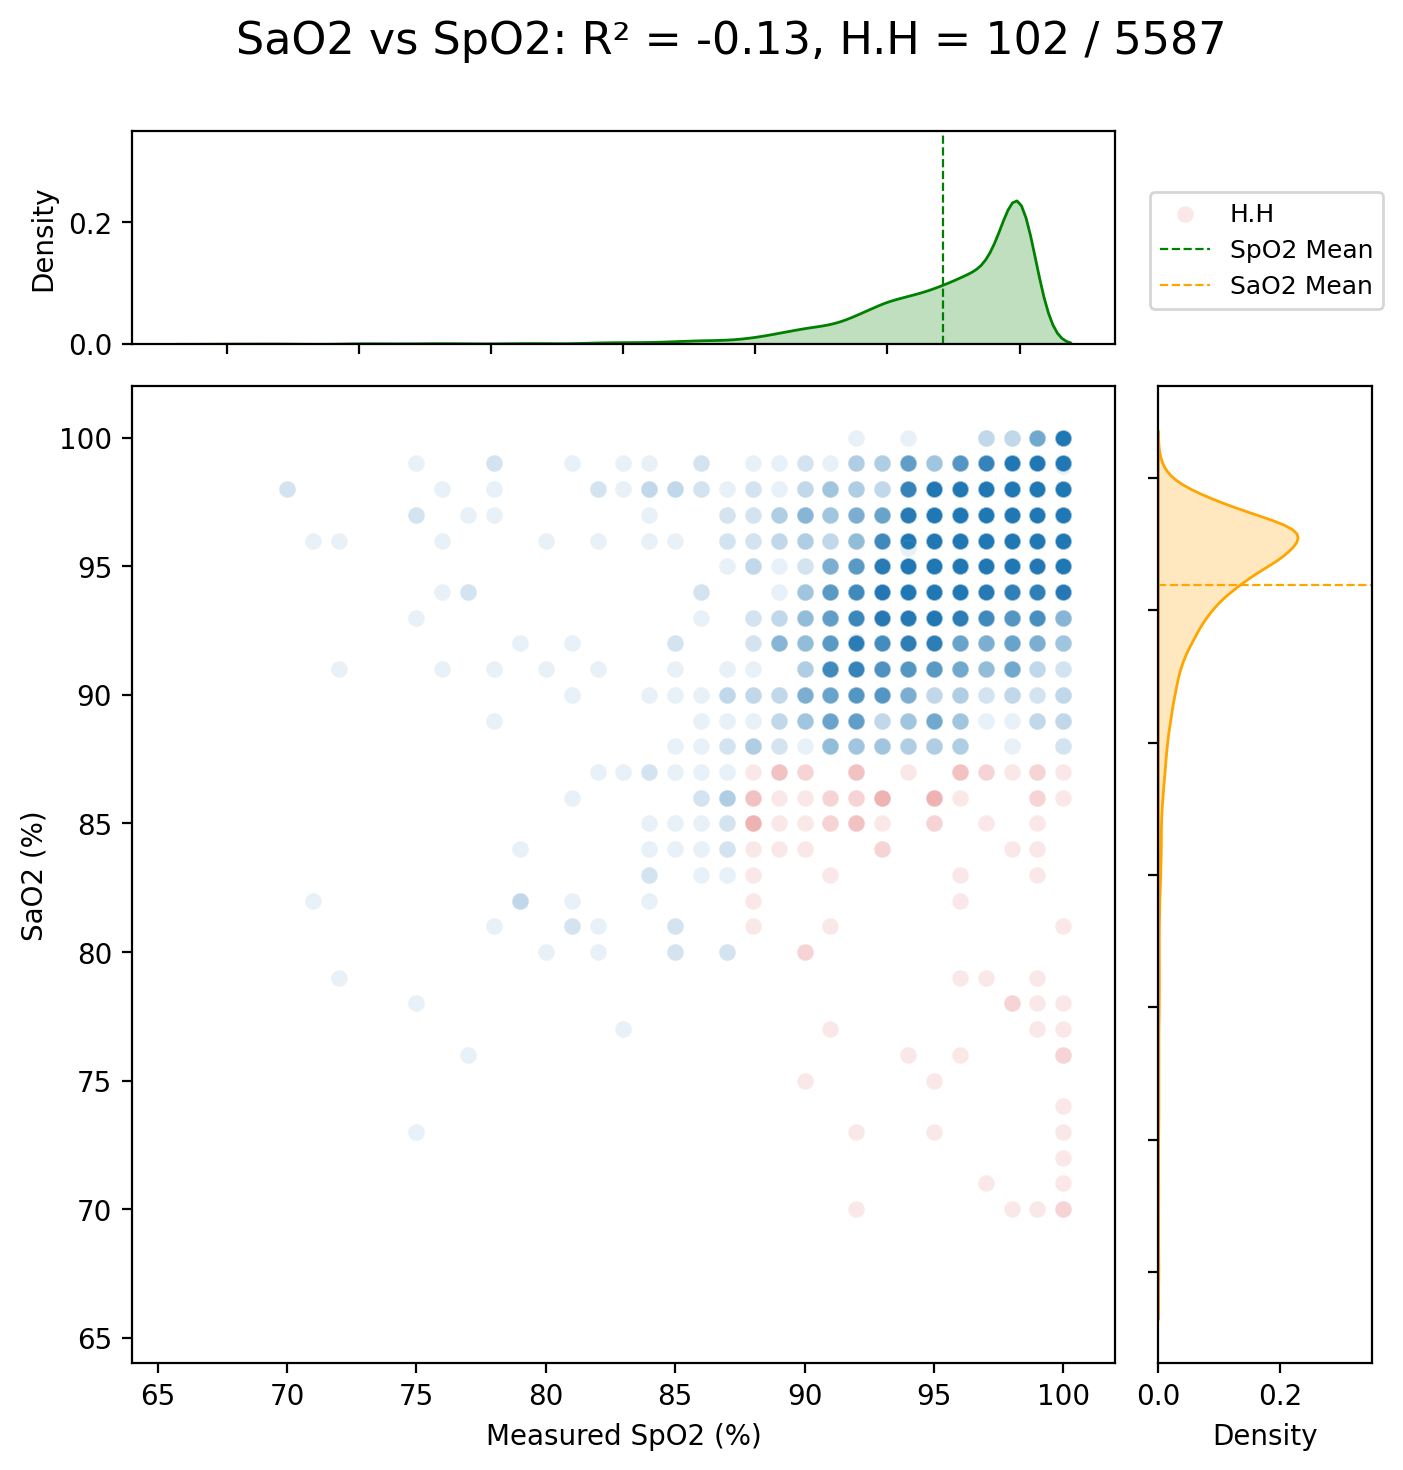

In [61]:
sao2_spo2_plot(data_final, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured")

#### Measurements Distributions

In [62]:
def sao2_spo2_dists(data, races):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(2 * len(races), 5))

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i],
                  color='orange', fill=True, label="SaO2")
      sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i],
                  color='green', fill=True, label="SpO2")
      ax[i].set_xlim([90,100])
      ax[i].legend(loc='upper left', ncol=1, fontsize=9)
      ax[i].set_xlabel('O2 Saturation (%)')
      ax[i].set_title(f'{r} Patients')

  fig.suptitle('SaO2 and SpO2 Density Distributions')
  plt.show()

In [63]:
# Encode Race Groups
data_final.race_group = data_final.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = data_final.race_group.unique() #["White", "Non-White"]

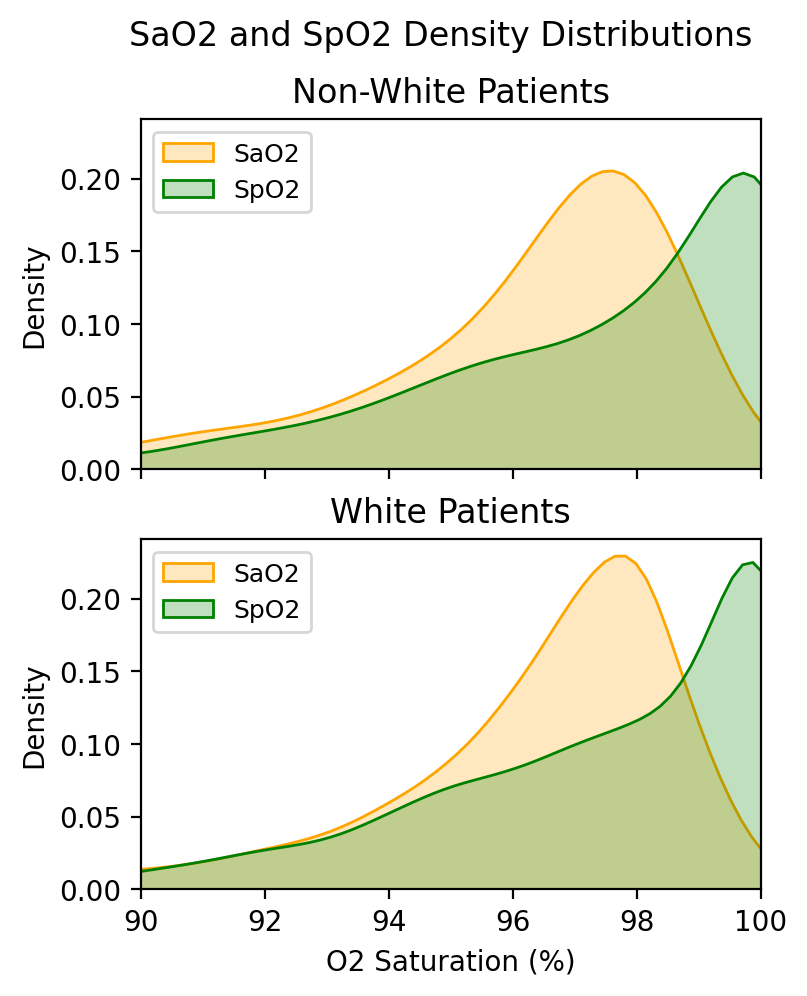

In [64]:
sao2_spo2_dists(data_final, races)

#### Gap Distributions

In [65]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

  fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

  colors = ['green', 'black']

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
                  ax=ax, color=colors[i], fill=True, label=r)

  ax.set_xlim([-4,4])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('SpO2 - SaO2 (%)')
  ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

  plt.show()

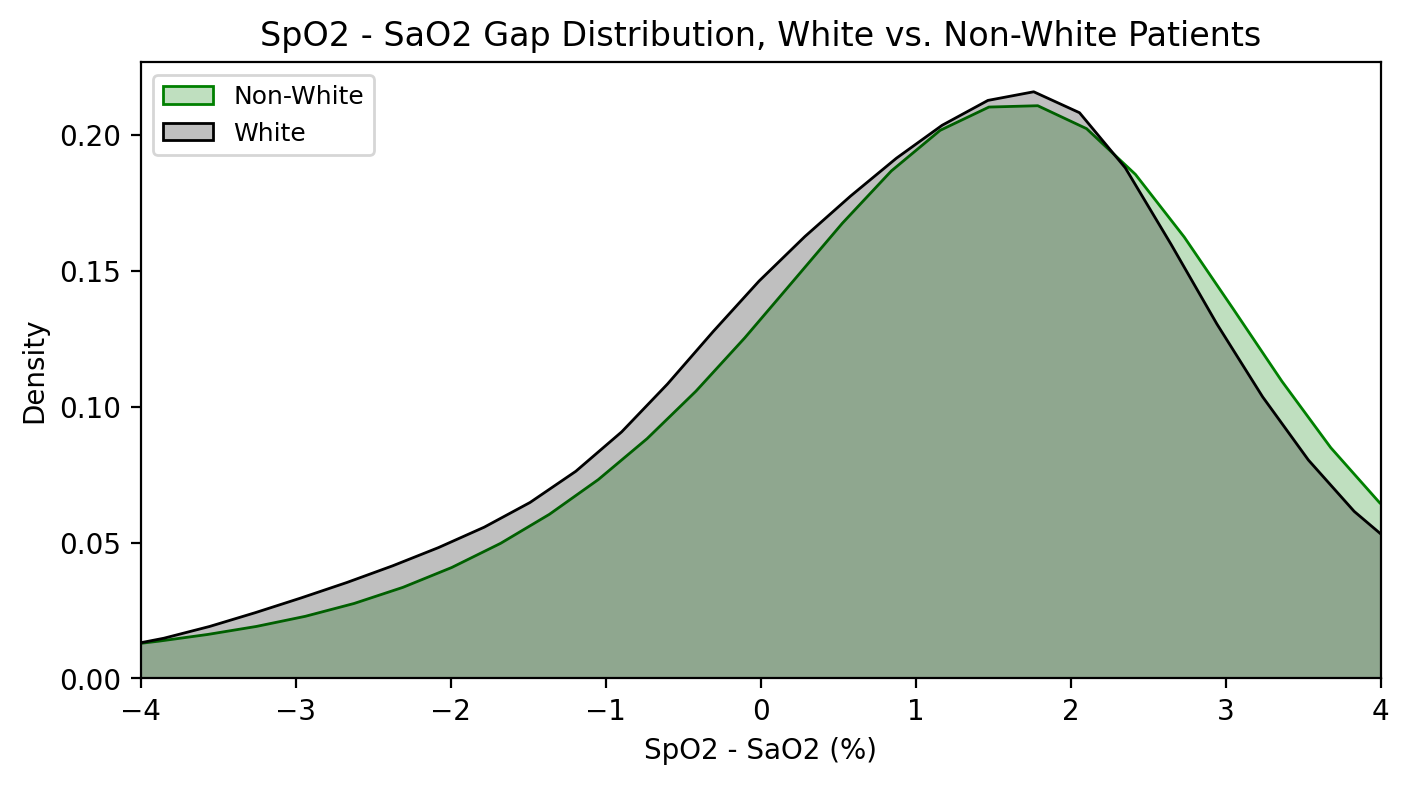

In [66]:
sao2_spo2_gap(data_final, races, comparison="White vs. Non-White")

### ✏️ Further EDA
`Create code below to answer the following questions`


What is the Outcome Distribution?

In [72]:
data_final.HH_study.value_counts(normalize=True)

0    0.981743
1    0.018257
Name: HH_study, dtype: float64

Is it more pronounced across certain groups?

In [73]:
data_final[data_final['race_group'] == "White"].HH_study.value_counts(normalize=True)

0    0.982216
1    0.017784
Name: HH_study, dtype: float64

In [74]:
data_final[data_final['race_group'] == "Non-White"].HH_study.value_counts(normalize=True)

0    0.980668
1    0.019332
Name: HH_study, dtype: float64

Add Other Questions that may be relevant

In [ ]:
# Code here!

In [ ]:
# Code here!

## 4. ML Task Definition

​
**We suggest (but not limited to), 4 possible ML tasks:**

* Hidden Hypoxemia Prediction (Classification)
* $SaO_2$ Prediction (Regression)
* $SaO_2 - SpO_2$ Gap Prediction (Regresion)
* $SaO_2 - SpO_2$ Gap Magnitude Prediction (Classification)

Discuss, as a team:

* Which task yields more value to tackle the presented problem?

* Which task is more prone to errors or biases?

* Where do we have more information?

* Where is there more outcome imbalance?

* Which decision-support algorithm would not harm patients further?

* How will the evaluation be done if we pick a certain task?

* Can we solve more than one task at once?


**Keep in mind that there is no right answer!**
​

### ✏️ Pick one!

`Pick one, or suggest your own:`